In [1]:
import warnings
warnings.filterwarnings('ignore')

import iris
import iris.plot as iplt
import numpy
import matplotlib.pyplot as plt
import glob

In [2]:
model = 'BCC-CSM2-MR'

## Salintiy profiles (in temperature space)

In [3]:
wm_file_pattern = '/g/data/r87/dbi599/zika/water-mass_Omon_%s_historical_*.nc'  %(model)
wm_file = glob.glob(wm_file_pattern)[0]

In [4]:
vcube_tbin = iris.load_cube(wm_file, 'Ocean Grid-Cell Volume binned by temperature')
print(vcube_tbin.summary(shorten=True))

Ocean Grid-Cell Volume binned by temperature / (m3) (year: 165; sea_water_potential_temperature: 56; region: 7)


In [5]:
vscube_tbin = iris.load_cube(wm_file, "Sea Water Salinity times Ocean Grid-Cell Volume binned by temperature")
print(vscube_tbin.summary(shorten=True))

Sea Water Salinity times Ocean Grid-Cell Volume binned by temperature / (g/kg m3) (year: 165; sea_water_potential_temperature: 56; region: 7)


In [6]:
so_profiles = vscube_tbin / vcube_tbin
print(so_profiles.summary(shorten=True))

unknown / (0.001 1)                 (year: 165; sea_water_potential_temperature: 56; region: 7)


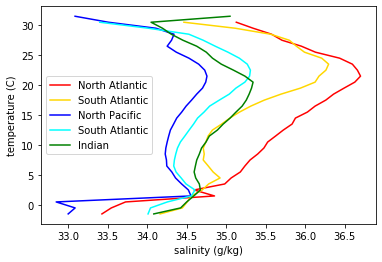

In [7]:
plt.plot(so_profiles.data[0, :, 0], so_profiles.coord('sea_water_potential_temperature').points,
         color='red', label='North Atlantic')
plt.plot(so_profiles.data[0, :, 1], so_profiles.coord('sea_water_potential_temperature').points,
         color='gold', label='South Atlantic')
plt.plot(so_profiles.data[0, :, 2], so_profiles.coord('sea_water_potential_temperature').points,
         color='blue', label='North Pacific')
plt.plot(so_profiles.data[0, :, 3], so_profiles.coord('sea_water_potential_temperature').points,
         color='cyan', label='South Atlantic')
plt.plot(so_profiles.data[0, :, 4], so_profiles.coord('sea_water_potential_temperature').points,
         color='green', label='Indian')
plt.xlabel('salinity (g/kg)')
plt.ylabel('temperature (C)')
plt.legend()
plt.show()

## Temperature profiles (in salinity space)

In [8]:
vcube_sbin = iris.load_cube(wm_file, 'Ocean Grid-Cell Volume binned by salinity')
print(vcube_sbin.summary(shorten=True))

Ocean Grid-Cell Volume binned by salinity / (m3) (year: 165; sea_water_salinity: 106; region: 7)


In [9]:
vtcube_sbin = iris.load_cube(wm_file, "Sea Water Potential Temperature times Ocean Grid-Cell Volume binned by salinity")
print(vtcube_sbin.summary(shorten=True))

Sea Water Potential Temperature times Ocean Grid-Cell Volume binned by salinity / (degC m3) (year: 165; sea_water_salinity: 106; region: 7)


In [10]:
thetao_profiles = vtcube_sbin / vcube_sbin
print(thetao_profiles.summary(shorten=True))

unknown / (K)                       (year: 165; sea_water_salinity: 106; region: 7)


In [11]:
thetao_profiles[0, :, 0]

Unknown (K),sea_water_salinity
Shape,106
Dimension coordinates,
sea_water_salinity,x
Scalar coordinates,
region,11
year,1850


In [12]:
thetao_profiles.coord('sea_water_salinity').points[3: -3]

array([30.05, 30.15, 30.25, 30.35, 30.45, 30.55, 30.65, 30.75, 30.85,
       30.95, 31.05, 31.15, 31.25, 31.35, 31.45, 31.55, 31.65, 31.75,
       31.85, 31.95, 32.05, 32.15, 32.25, 32.35, 32.45, 32.55, 32.65,
       32.75, 32.85, 32.95, 33.05, 33.15, 33.25, 33.35, 33.45, 33.55,
       33.65, 33.75, 33.85, 33.95, 34.05, 34.15, 34.25, 34.35, 34.45,
       34.55, 34.65, 34.75, 34.85, 34.95, 35.05, 35.15, 35.25, 35.35,
       35.45, 35.55, 35.65, 35.75, 35.85, 35.95, 36.05, 36.15, 36.25,
       36.35, 36.45, 36.55, 36.65, 36.75, 36.85, 36.95, 37.05, 37.15,
       37.25, 37.35, 37.45, 37.55, 37.65, 37.75, 37.85, 37.95, 38.05,
       38.15, 38.25, 38.35, 38.45, 38.55, 38.65, 38.75, 38.85, 38.95,
       39.05, 39.15, 39.25, 39.35, 39.45, 39.55, 39.65, 39.75, 39.85,
       39.95])

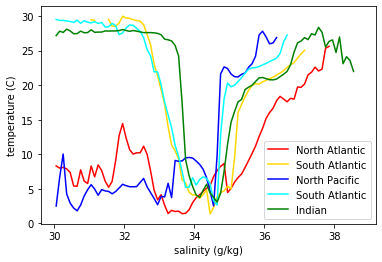

In [13]:
iplt.plot(thetao_profiles[0, 3:-3, 0], color='red', label='North Atlantic')
iplt.plot(thetao_profiles[0, 3:-3, 1], color='gold', label='South Atlantic')
iplt.plot(thetao_profiles[0, 3:-3, 2], color='blue', label='North Pacific')
iplt.plot(thetao_profiles[0, 3:-3, 3], color='cyan', label='South Atlantic')
iplt.plot(thetao_profiles[0, 3:-3, 4], color='green', label='Indian')
plt.xlabel('salinity (g/kg)')
plt.ylabel('temperature (C)')
plt.legend()
plt.show()

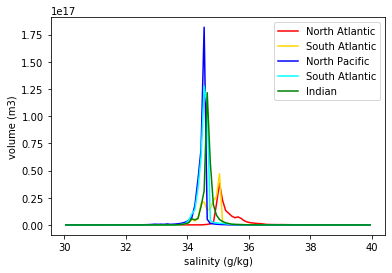

In [14]:
iplt.plot(vcube_sbin[0, 3:-3, 0], color='red', label='North Atlantic')
iplt.plot(vcube_sbin[0, 3:-3, 1], color='gold', label='South Atlantic')
iplt.plot(vcube_sbin[0, 3:-3, 2], color='blue', label='North Pacific')
iplt.plot(vcube_sbin[0, 3:-3, 3], color='cyan', label='South Atlantic')
iplt.plot(vcube_sbin[0, 3:-3, 4], color='green', label='Indian')
plt.xlabel('salinity (g/kg)')
plt.ylabel('volume (m3)')
plt.legend()
plt.show()

## Surface water flux (in temperature space)

In [316]:
wfo_hist_pattern = '/g/data/r87/dbi599/zika/wfo-tos-binned_Omon_%s_historical_*.nc' %(model)
#wfo_hist_pattern = '/g/data/r87/dbi599/zika/wfo-thetao-binned_Omon_%s_historical_*.nc' %(model)
wfo_hist_file = glob.glob(wfo_hist_pattern)[0]

In [317]:
wfo_hist_cube = iris.load_cube(wfo_hist_file, 'water_flux_into_sea_water')
print(wfo_hist_cube.summary(shorten=True))

water_flux_into_sea_water / (kg s-1) (year: 165; sea_surface_temperature: 44; region: 7)


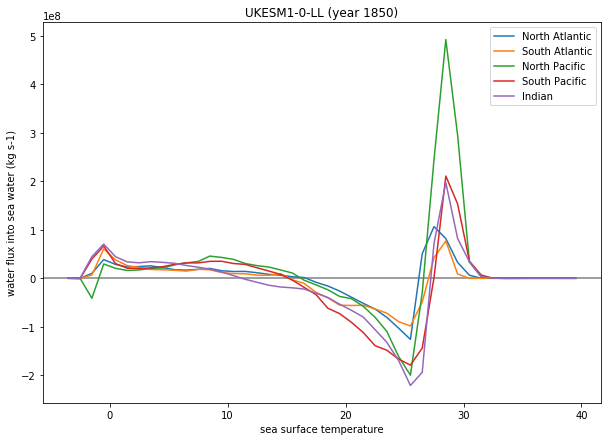

In [318]:
fig = plt.figure(figsize=[10, 7])
plt.axhline(y=0, color='0.5')

iplt.plot(wfo_hist_cube[0, :, 0], label='North Atlantic')
iplt.plot(wfo_hist_cube[0, :, 1], label='South Atlantic')
iplt.plot(wfo_hist_cube[0, :, 2], label='North Pacific')
iplt.plot(wfo_hist_cube[0, :, 3], label='South Pacific')
iplt.plot(wfo_hist_cube[0, :, 4], label='Indian')

plt.legend()
plt.xlabel('sea surface temperature')
plt.ylabel('water flux into sea water (kg s-1)')
plt.title('%s (year 1850)'   %(model))
plt.show()

## Volume distribution

In [60]:
vol_pattern = '/g/data/r87/dbi599/zika/volo-tsdist_Omon_%s_historical_*.nc'  %(model)
vol_file = glob.glob(vol_pattern)[0]
vol_cube = iris.load_cube(vol_file)
print(vol_cube.summary(shorten=True))

ocean_volume / (m3)                 (sea_water_salinity: 300; sea_water_potential_temperature: 176; region: 7)


In [61]:
vol_cube.data.sum()

1.3706997676093468e+18

In [62]:
def plot_basin(vol_cube, salinity_cube, basin_name):
    """Plot at volume distribution."""
    
    x_values = vol_cube.coord('sea_water_salinity').points
    y_values = vol_cube.coord('sea_water_potential_temperature').points
    extents = [x_values[0], x_values[-1], y_values[0], y_values[-1]]
    
    basin_dict = {'north_atlantic': 0, 'south_atlantic': 1,
                  'north_pacific': 2, 'south_pacific': 3,
                  'indian': 4, 'arctic': 5, 'marginal_seas_and_land': 6} 

    log_hist = numpy.log(vol_cube.data[:, :, basin_dict[basin_name]]).T
    
    plt.figure(figsize=(9, 8))
    plt.imshow(log_hist, origin='lower', extent=extents, aspect='auto', cmap='hot_r')
    cb = plt.colorbar()
    cb.set_label('log(volume), $m^3 (^\circ C \; g/kg)^{-1}$')

    sprofile = salinity_cube.data[-1, :, basin_dict[basin_name]]
    plt.plot(sprofile, salinity_cube.coord('sea_water_potential_temperature').points)
    
    plt.xlim(x_values[0], x_values[-1])
    plt.title(basin_name)
    plt.xlabel('salinity (g/kg)')
    plt.ylabel('temperature (C)')
    plt.show()

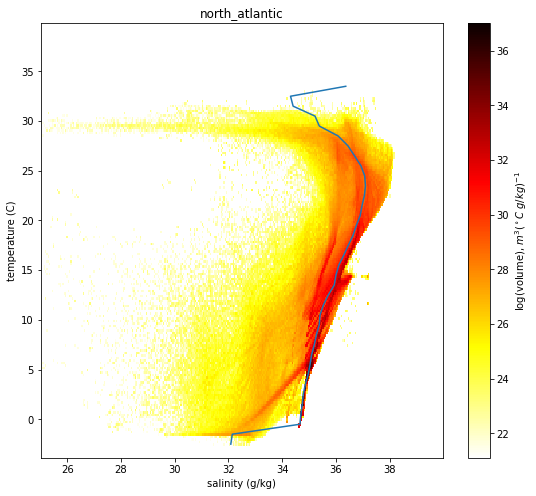

In [63]:
plot_basin(vol_cube, so_profiles, 'north_atlantic')

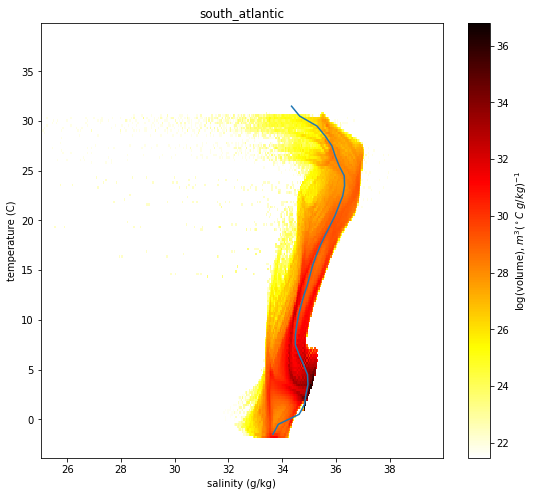

In [10]:
plot_basin(vol_cube, so_profiles, 'south_atlantic')

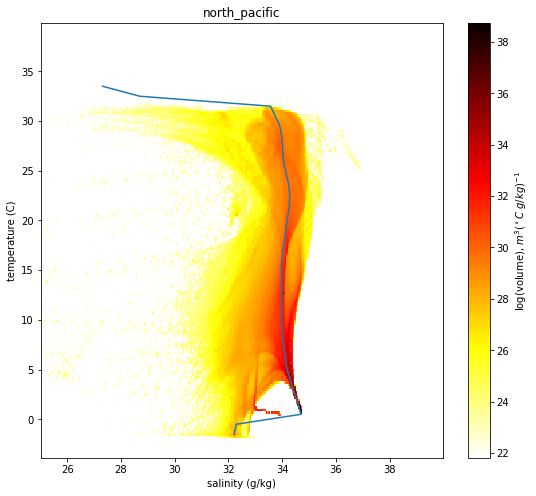

In [11]:
plot_basin(vol_cube, so_profiles, 'north_pacific')

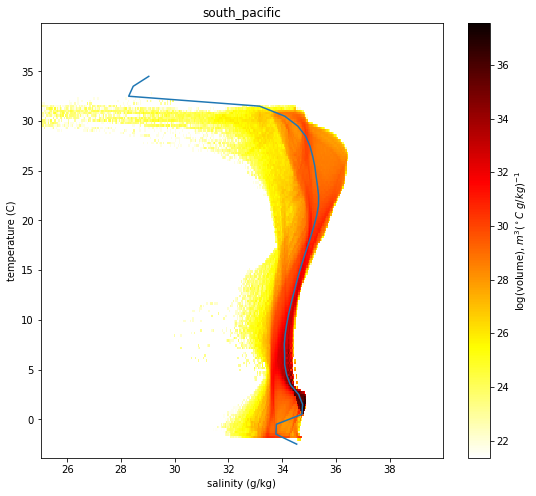

In [12]:
plot_basin(vol_cube, so_profiles, 'south_pacific')

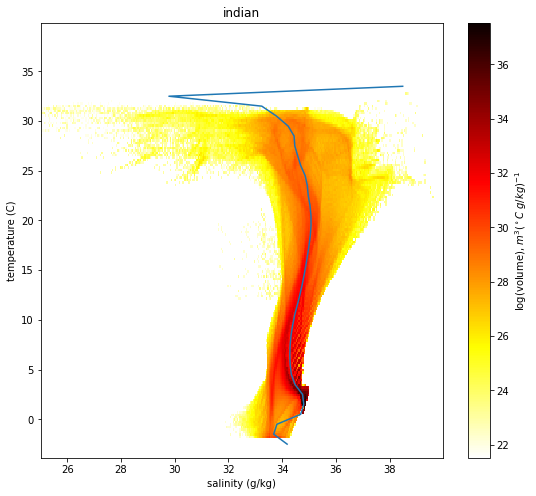

In [13]:
plot_basin(vol_cube, so_profiles, 'indian')

# Surface layer area distribution

In [17]:
area_file = '/g/data/r87/dbi599/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Omon/areao/gn/v20190429/areao-tsdist_Omon_CanESM5_historical_r1i1p1f1_gn_2005-2014-monthly-clim.nc'
area_cube = iris.load_cube(area_file)
print(area_cube.summary(shorten=True))

cell_area / (m2)                    (sea_water_salinity: 300; sea_water_potential_temperature: 176; region: 7)


In [20]:
awm_files = glob.glob('/g/data/r87/dbi599/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Omon/water-mass/gn/v20190429/surface-water-mass_Omon_CanESM5_historical_r1i1p1f1_gn_*.nc')
awm_files.sort()

In [21]:
acube = iris.load_cube(awm_files[-1], 'cell_area')
print(acube.summary(shorten=True))

cell_area / (m2)                    (year: 165; sea_water_potential_temperature: 44; region: 7)


In [24]:
#ascube = iris.load_cube(awm_files[-1], "Sea Water Salinity times Grid-Cell Area")
ascube = iris.load_cube(awm_files[-1], "Sea Water Salinity times Grid-Cell Area for Ocean Variables")
print(ascube.summary(shorten=True))

Sea Water Salinity times Grid-Cell Area for Ocean Variables / (g/kg m2) (year: 165; sea_water_potential_temperature: 44; region: 7)


In [25]:
sos_profiles = ascube / acube
print(sos_profiles.summary(shorten=True))

unknown / (0.001 1)                 (year: 165; sea_water_potential_temperature: 44; region: 7)


In [26]:
def plot_surface_basin(area_cube, salinity_cube, basin_name):
    """Plot the surface layer area distribution."""
    
    x_values = area_cube.coord('sea_water_salinity').points
    y_values = area_cube.coord('sea_water_potential_temperature').points
    extents = [x_values[0], x_values[-1], y_values[0], y_values[-1]]
    
    basin_dict = {'north_atlantic': 0, 'south_atlantic': 1,
                  'north_pacific': 2, 'south_pacific': 3,
                  'indian': 4, 'arctic': 5, 'marginal_seas_and_land': 6} 

    log_hist = numpy.log(area_cube.data[:, :, basin_dict[basin_name]]).T
    #hist = area_cube.data[:, :, basin_dict[basin_name]].T
    
    plt.figure(figsize=(9, 8))
    plt.imshow(log_hist, origin='lower', extent=extents, aspect='auto', cmap='hot_r')
    cb = plt.colorbar()
    cb.set_label('log(area), $m^2 (^\circ C \; g/kg)^{-1}$')

    sprofile = salinity_cube.data[-1, :, basin_dict[basin_name]]
    plt.plot(sprofile, salinity_cube.coord('sea_water_potential_temperature').points)
    
    plt.xlim(x_values[0], x_values[-1])
    plt.title(basin_name)
    plt.xlabel('salinity (g/kg)')
    plt.ylabel('temperature (C)')
    plt.show()

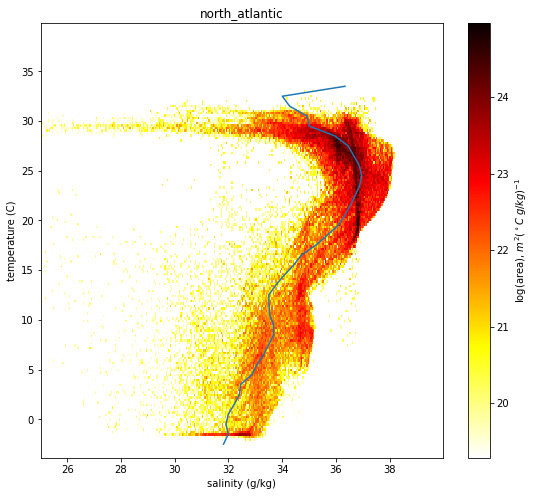

In [27]:
plot_surface_basin(area_cube, sos_profiles, 'north_atlantic')

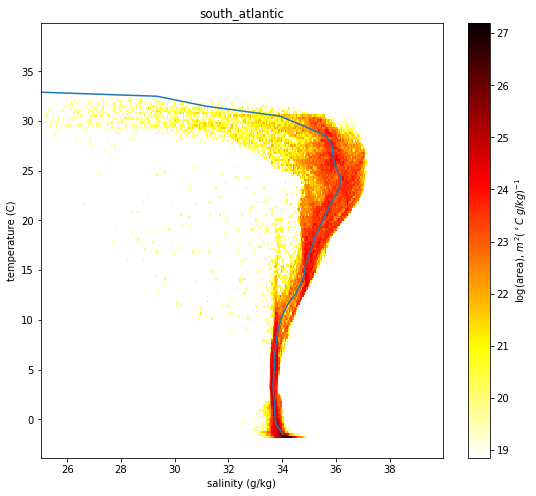

In [28]:
plot_surface_basin(area_cube, sos_profiles, 'south_atlantic')

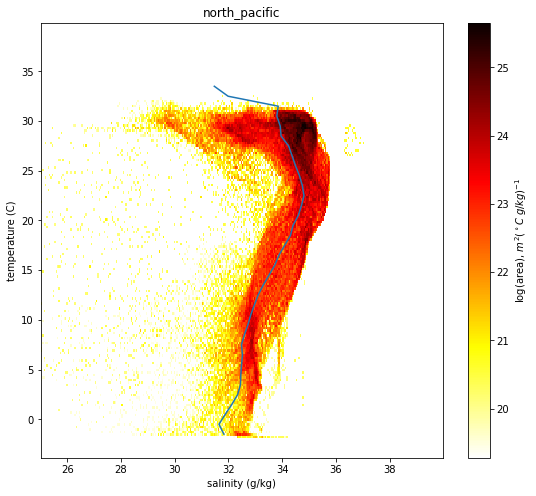

In [29]:
plot_surface_basin(area_cube, sos_profiles, 'north_pacific')

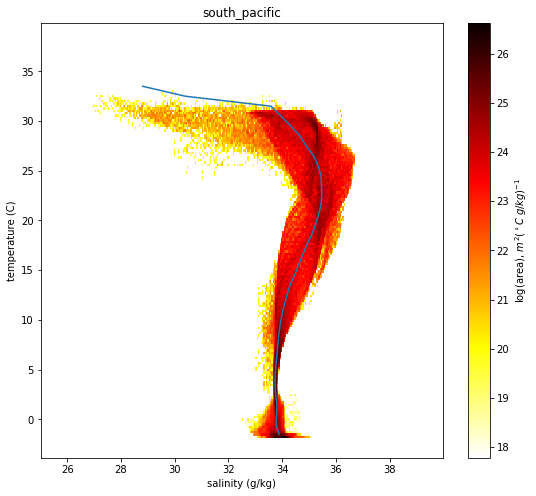

In [30]:
plot_surface_basin(area_cube, sos_profiles, 'south_pacific')

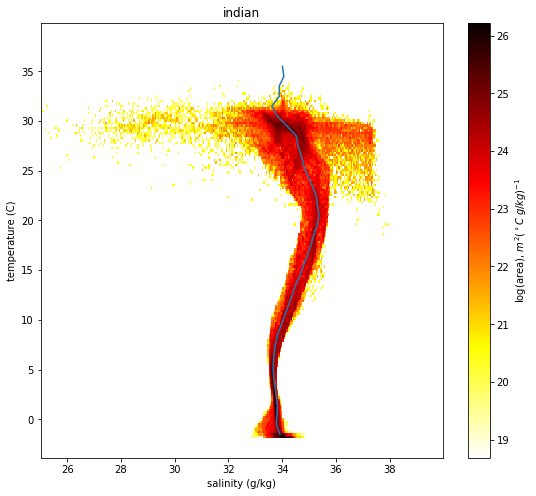

In [31]:
plot_surface_basin(area_cube, sos_profiles, 'indian')